In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [40]:
signal.hann?

In [83]:
def plot_graph(b, name = 'x', phase = False, graph_name = 'Magnitude response'):
    w, h = signal.freqz(b)
    w_n = w/max(w)
    
    if phase:
        angles = np.unwrap(np.angle(h))
        plt.plot(w_n, angles, label=f'{name}')
        plt.ylabel("Phase (rad)")

    else:
        h_n = 20 * np.log10 (abs(h))
        plt.plot(w_n,h_n, label=f'{name}')
        plt.ylabel("Magnitude (db)")

    
    plt.legend()
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(f'{graph_name}')

In [74]:
def filter_analyse(b, interval_band, interval_lim, att, ripple):
    result = True
    w, h = signal.freqz(b)
    w_n = w/max(w)
    h_n = 20 * np.log10 (abs(h))

    max_passband = None
    min_passband = None


    for x, y in zip(w_n, h_n):
        if x > interval_band[0] and x < interval_band[1]:
            if y < -3:
                return False
            if min_passband == None:
                min_passband = y
                max_passband = y

            min_passband = min_passband if min_passband < y else y
            max_passband = max_passband if max_passband > y else y
            
            if max_passband - min_passband > ripple:
                return False
                
        if x < interval_lim[0] or x > interval_lim[1]:
            if y > -att:
                return False
        

    return True



In [75]:
# signal.firwin?

In [82]:
def get_window_order(band, limit, att, ripple, wind):
    order = 1
    sign = signal.firwin(order, [F1_n, F2_n], pass_zero = 'bandpass', window = wind)
    while not filter_analyse(sign, [F1, F2], [F_s1_n, F_s2_n], att, ripple):
        sign = signal.firwin(order, [F1_n, F2_n], pass_zero = 'bandpass', window = wind)
        order += 1
    
    print('order', order)
    plot_graph(sign)
    return order

order 154


154

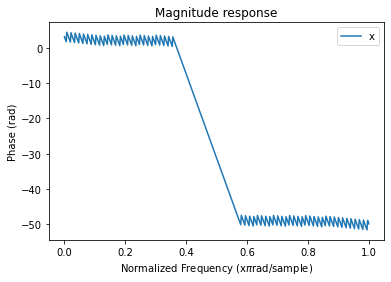

In [79]:
F1 = 6 * 10**6
F2 = 8 * 10**6
F_s1 = 5.5 * 10**6
F_s2 = 8.5 * 10**6
F_freq = 30 * 10**6
F1_n = 2 * F1 / F_freq
F2_n = 2 * F2 / F_freq
F_s1_n = 2 * F_s1 / F_freq
F_s2_n = 2 * F_s2 / F_freq
ripple = 0.5
att = 60
get_window_order([F1_n, F2_n], [F_s1_n, F_s2_n], att, ripple, 'blackman' )



order 152


152

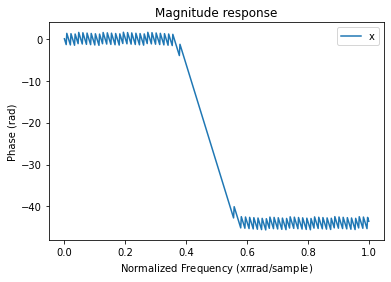

In [80]:
get_window_order([F1_n, F2_n], [F_s1_n, F_s2_n], att, ripple, 'hamming')


order 241


241

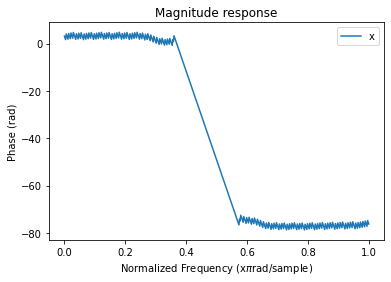

In [81]:
get_window_order([F1_n, F2_n], [F_s1_n, F_s2_n], att, ripple, 'flattop')

order 187


187

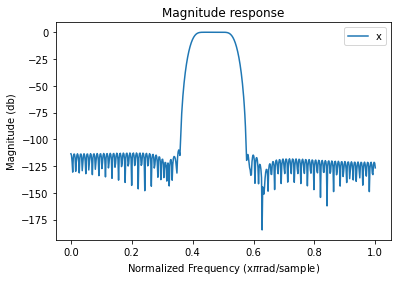

In [86]:
get_window_order([F1_n, F2_n], [F_s1_n, F_s2_n], att, ripple, 'nuttall')